<a href="https://colab.research.google.com/github/pabloac31/TFG/blob/master/cifar10_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/pabloac31/TFG.git
%cd TFG

/content/TFG


In [70]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from cifar10_models import *
from utils import *
from adversarial_attacks import *

In [0]:
iv3 = inception_v3(pretrained=True)

In [74]:
# Define what device we are using
use_cuda=True
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


In [0]:
test_loader = testloader_cifar10('./data', 256)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
test_model(iv3, device, test_loader)

100%|██████████| 40/40 [00:21<00:00,  1.83it/s]


0.9541

In [75]:
adv_loader = testloader_cifar10('./data', 1)

Files already downloaded and verified


In [0]:
test_fgsm(iv3, device, './data/img1.png', 0.56)





  0%|          | 0/10000 [00:00<?, ?it/s]



  0%|          | 1/10000 [00:04<13:39:09,  4.92s/it]


======== RESULTS ========
Test Accuracy = 0 / 1 = 0.0
Average confidence = 0.8907894492149353
Average time = 4.872506618499756
Average magnitude of perturbations = 10.950575828552246
Model robustness = 0.2533632814884186


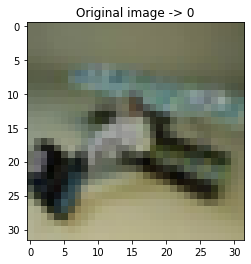

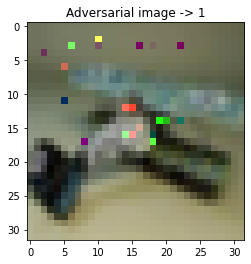

In [104]:
#params = {'epsilon': 0.4}
#params = {'num_classes': 10, 'overshoot': 0.02, 'max_iter': 50, 'lambda_fac': 1.0}
params = {'lambda_': 3., 'max_iter': 20, 'epsilon': 0.2, 'delta': 255}
adv_examples = attack_model(iv3, device, adv_loader, 'sparsefool', params, iters=1)

plt.imshow(denormalize_cifar10(adv_examples[0][2]).transpose((1,2,0)))
plt.title('Original image -> ' + str(adv_examples[0][0]))
plt.show()
plt.imshow(denormalize_cifar10(adv_examples[0][3]).transpose((1,2,0)))
plt.title('Adversarial image -> ' + str(adv_examples[0][1]))
plt.show()